In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random 

## Generate data

In [16]:
def sign(value):
    if value >= 0:
        return 1
    else:
        return -1

def generate_uniform_data(start, end, size, noice_rate):
    x = [random.uniform(start, end) for _ in range(size)]
    y = [sign(x[i]) for i in range(size)]
    probs = [random.uniform(0, 1) for _ in range(len(y))]
    y = [ probs[i]<noice_rate and -value or value for i, value in enumerate(y)]
    
    return x, y

def evaluate(x, y, theta, pn):
    err_nums = 0
    
    for i, value in enumerate(x):
        if y[i] != sign(pn*(value - theta)):
            err_nums += 1
        
    return err_nums/len(y)

def compute_Eout(theta, noice_rate, pn):
    v = abs(theta)
    s = 1 - noice_rate
    Eout = 0.5 + pn*(v-1)*(s-0.5)
    
    return Eout

## Question 7/8

In [17]:
def stump_algorithm(x, y, noice_rate=0.2):
    thetas = np.sort(x)
    pns = [-1, 1]
    best_Ein  = 1
    best_Eout = 1
    for theta in thetas:
        for pn in pns:
            Ein = evaluate(x, y, theta, pn)

            if Ein < best_Ein:
                best_Ein  = Ein
                best_Eout = compute_Eout(theta, noice_rate, pn)

    return best_Ein, best_Eout

In [18]:
def measurement(iterations, size, noice_rate):
    Ein_sum = 0
    Eout_sum = 0
    
    record = []
    for iter in range(iterations):
        x, y = generate_uniform_data(-1, 1, size, 0.2)
        Ein, Eout = stump_algorithm(x, y, noice_rate=0.2)
        record.append(Ein - Eout)
        Ein_sum += Ein
        Eout_sum += Eout
        
        if (not iter%2):
            print("-----------------------")
            print("Round {}: \nEin: {}\nEout: {}".format(iter, Ein, Eout))

    return record

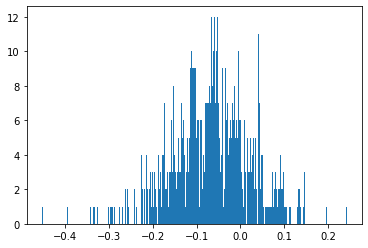

In [20]:
record = measurement(1000, 20, 0.2)


plt.hist(record, bins=500)
plt.savefig('problem7.png')
plt.show()

-----------------------
Round 0: 
Ein: 0.2125
Eout: 0.2004178203325141
-----------------------
Round 2: 
Ein: 0.199
Eout: 0.2000659502990209
-----------------------
Round 4: 
Ein: 0.213
Eout: 0.20025848838871124
-----------------------
Round 6: 
Ein: 0.2075
Eout: 0.20176555311179478
-----------------------
Round 8: 
Ein: 0.185
Eout: 0.20030007749568984
-----------------------
Round 10: 
Ein: 0.191
Eout: 0.20091196566111807
-----------------------
Round 12: 
Ein: 0.2
Eout: 0.20148292297168047
-----------------------
Round 14: 
Ein: 0.2
Eout: 0.200250890458747
-----------------------
Round 16: 
Ein: 0.2045
Eout: 0.20012680796983828
-----------------------
Round 18: 
Ein: 0.1955
Eout: 0.20129205270920175
-----------------------
Round 20: 
Ein: 0.182
Eout: 0.20019366802498673
-----------------------
Round 22: 
Ein: 0.2105
Eout: 0.20073115995485424
-----------------------
Round 24: 
Ein: 0.202
Eout: 0.2001473580781199
-----------------------
Round 26: 
Ein: 0.1885
Eout: 0.20148933595703244


-----------------------
Round 226: 
Ein: 0.1975
Eout: 0.2004968422298612
-----------------------
Round 228: 
Ein: 0.214
Eout: 0.20003281319950855
-----------------------
Round 230: 
Ein: 0.194
Eout: 0.2016748639685208
-----------------------
Round 232: 
Ein: 0.1915
Eout: 0.20019621770704948
-----------------------
Round 234: 
Ein: 0.213
Eout: 0.20022423907468667
-----------------------
Round 236: 
Ein: 0.1885
Eout: 0.20045812191921641
-----------------------
Round 238: 
Ein: 0.1995
Eout: 0.20004046526620745
-----------------------
Round 240: 
Ein: 0.2015
Eout: 0.20009894778637938
-----------------------
Round 242: 
Ein: 0.2195
Eout: 0.20147542598945156
-----------------------
Round 244: 
Ein: 0.205
Eout: 0.20046571658012502
-----------------------
Round 246: 
Ein: 0.207
Eout: 0.20010121395707076
-----------------------
Round 248: 
Ein: 0.2105
Eout: 0.20030843492128525
-----------------------
Round 250: 
Ein: 0.199
Eout: 0.20147242707101803
-----------------------
Round 252: 
Ein: 0.203

-----------------------
Round 450: 
Ein: 0.2015
Eout: 0.20111737444172761
-----------------------
Round 452: 
Ein: 0.2065
Eout: 0.2000032977229071
-----------------------
Round 454: 
Ein: 0.2075
Eout: 0.20118081080706385
-----------------------
Round 456: 
Ein: 0.1905
Eout: 0.20061817247754132
-----------------------
Round 458: 
Ein: 0.1955
Eout: 0.20014744839420706
-----------------------
Round 460: 
Ein: 0.221
Eout: 0.20092316757118212
-----------------------
Round 462: 
Ein: 0.1875
Eout: 0.20064948259817378
-----------------------
Round 464: 
Ein: 0.203
Eout: 0.2000969392872196
-----------------------
Round 466: 
Ein: 0.189
Eout: 0.20014832261892834
-----------------------
Round 468: 
Ein: 0.1875
Eout: 0.20059031531730281
-----------------------
Round 470: 
Ein: 0.195
Eout: 0.20031050426112595
-----------------------
Round 472: 
Ein: 0.2025
Eout: 0.20006814519941835
-----------------------
Round 474: 
Ein: 0.1895
Eout: 0.200717883188901
-----------------------
Round 476: 
Ein: 0.214

-----------------------
Round 674: 
Ein: 0.2105
Eout: 0.20035606284779128
-----------------------
Round 676: 
Ein: 0.196
Eout: 0.20025079113700078
-----------------------
Round 678: 
Ein: 0.1945
Eout: 0.20061839266816972
-----------------------
Round 680: 
Ein: 0.203
Eout: 0.20046886606375047
-----------------------
Round 682: 
Ein: 0.2035
Eout: 0.20005654855031801
-----------------------
Round 684: 
Ein: 0.1945
Eout: 0.20012719726700146
-----------------------
Round 686: 
Ein: 0.2045
Eout: 0.2006381490132812
-----------------------
Round 688: 
Ein: 0.199
Eout: 0.20026700496208683
-----------------------
Round 690: 
Ein: 0.2015
Eout: 0.2004550258234139
-----------------------
Round 692: 
Ein: 0.2015
Eout: 0.2002426410339856
-----------------------
Round 694: 
Ein: 0.2035
Eout: 0.20044503998855168
-----------------------
Round 696: 
Ein: 0.202
Eout: 0.20014694699087837
-----------------------
Round 698: 
Ein: 0.199
Eout: 0.20009570716774694
-----------------------
Round 700: 
Ein: 0.209

-----------------------
Round 900: 
Ein: 0.182
Eout: 0.20000981713801802
-----------------------
Round 902: 
Ein: 0.214
Eout: 0.20061060935623987
-----------------------
Round 904: 
Ein: 0.214
Eout: 0.20107117914750466
-----------------------
Round 906: 
Ein: 0.1925
Eout: 0.20021332327545144
-----------------------
Round 908: 
Ein: 0.1805
Eout: 0.20218366674731025
-----------------------
Round 910: 
Ein: 0.1945
Eout: 0.20119506152319566
-----------------------
Round 912: 
Ein: 0.2065
Eout: 0.2002105401074752
-----------------------
Round 914: 
Ein: 0.1965
Eout: 0.2008718668518814
-----------------------
Round 916: 
Ein: 0.196
Eout: 0.2018138054505712
-----------------------
Round 918: 
Ein: 0.1975
Eout: 0.2007401593562847
-----------------------
Round 920: 
Ein: 0.188
Eout: 0.20016848552521627
-----------------------
Round 922: 
Ein: 0.206
Eout: 0.20103180874969007
-----------------------
Round 924: 
Ein: 0.2035
Eout: 0.20132610888106767
-----------------------
Round 926: 
Ein: 0.193
E

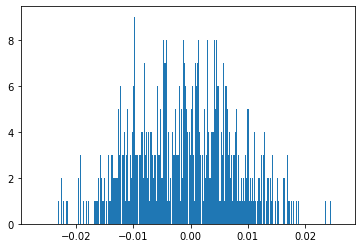

In [8]:
record = measurement(1000, 2000, 0.2)

plt.hist(record, bins=500)
plt.savefig('problem8.png')
plt.show()